In [1]:
import copy
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display

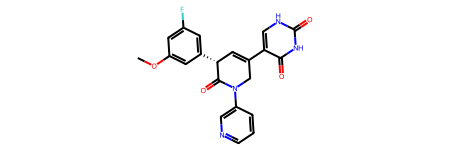

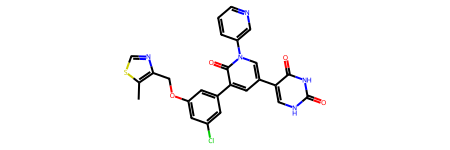

In [2]:
#mol03 = Chem.SDMolSupplier('M03.sdf')
#mol13 = Chem.SDMolSupplier('M13.sdf')

mol03 = Chem.MolFromSmiles("O=c1c(C2=C[C@H](C(=O)N(C2)c2cnccc2)c2cc(F)cc(OC)c2)c[nH]c(=O)[nH]1")
mol13 = Chem.MolFromSmiles("c1sc(c(n1)COc1cc(Cl)cc(c1)c1cc(c2c[nH]c(=O)[nH]c2=O)cn(c1=O)c1cnccc1)C")

mols = [mol03, mol13]

for mol in mols:
    display(mol)


Trying stuff with BRICS

[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not removing hydrogen atom without neighbors
[16:25:44] WARNING: not r

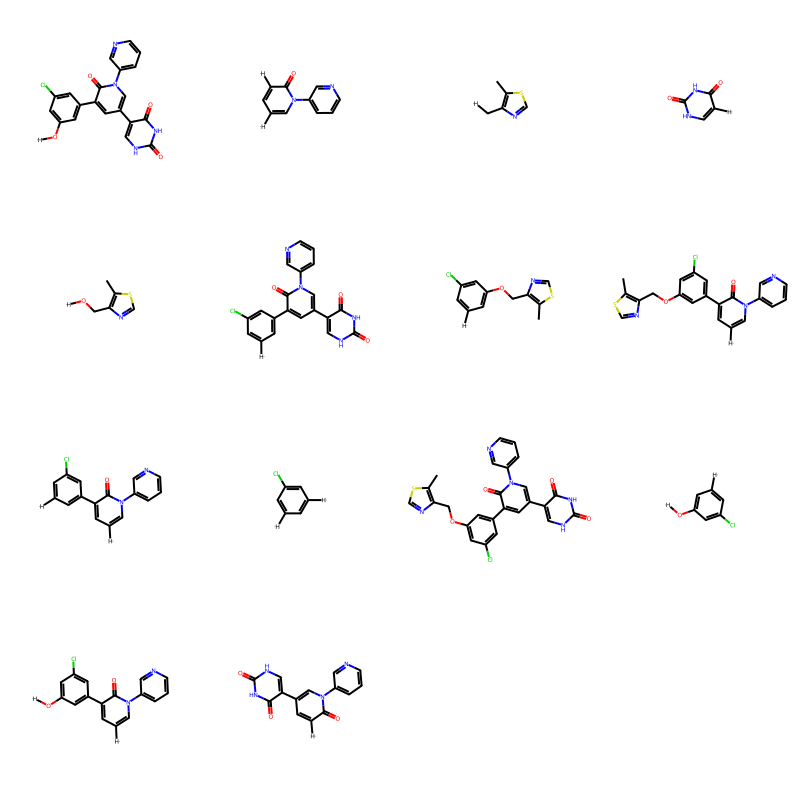

In [3]:
# generate dummy atom
du = Chem.MolFromSmiles('*')

all_smiles = []
## fragmenting using BRICSDecompose
for mol in mols:
    frags = list(Chem.BRICS.BRICSDecompose(mol, minFragmentSize=7, keepNonLeafNodes=True, returnMols=False))
    ##if returnMols = False
    mols = [Chem.MolFromSmiles(x) for x in frags]
    ## replace dummy atoms with hydrogens
    molh = [AllChem.ReplaceSubstructs(x,du,Chem.MolFromSmiles('[H]'), True)[0] for x in mols]
    ## convert mols to smiles
    all_smiles.append([Chem.MolToSmiles(x) for x in molh])

Draw.MolsToGridImage(molh, molsPerRow=4, subImgSize=(200, 200))

In [4]:
all_smiles

[['[H]c1cc(F)cc(OC)c1',
  '[H]C1C=C(c2c[nH]c(=O)[nH]c2=O)CN(c2cccnc2)C1=O',
  'COc1cc(F)cc([C@@H]2C=C(c3c[nH]c(=O)[nH]c3=O)CN(c3cccnc3)C2=O)c1'],
 ['[H]Oc1cc(Cl)cc(-c2cc(-c3c[nH]c(=O)[nH]c3=O)cn(-c3cccnc3)c2=O)c1',
  '[H]c1cc([H])c(=O)n(-c2cccnc2)c1',
  '[H]Cc1ncsc1C',
  '[H]c1c[nH]c(=O)[nH]c1=O',
  '[H]OCc1ncsc1C',
  '[H]c1cc(Cl)cc(-c2cc(-c3c[nH]c(=O)[nH]c3=O)cn(-c3cccnc3)c2=O)c1',
  '[H]c1cc(Cl)cc(OCc2ncsc2C)c1',
  '[H]c1cc(-c2cc(Cl)cc(OCc3ncsc3C)c2)c(=O)n(-c2cccnc2)c1',
  '[H]c1cc(Cl)cc(-c2cc([H])cn(-c3cccnc3)c2=O)c1',
  '[H]c1cc([H])cc(Cl)c1',
  'Cc1scnc1COc1cc(Cl)cc(-c2cc(-c3c[nH]c(=O)[nH]c3=O)cn(-c3cccnc3)c2=O)c1',
  '[H]Oc1cc([H])cc(Cl)c1',
  '[H]Oc1cc(Cl)cc(-c2cc([H])cn(-c3cccnc3)c2=O)c1',
  '[H]c1cc(-c2c[nH]c(=O)[nH]c2=O)cn(-c2cccnc2)c1=O']]

In [5]:
## removing dummy atoms from molecules
x = 0
##  all_smiles is a list of list so, need to use a nested loop
for i in all_smiles:
    for smi in sorted(i):
        mol = Chem.MolFromSmiles(smi)
        mol = Chem.AddHs(mol)
        ## save 2D sdf file
        sdfFile2d = open('tmp/tmp_' +str(x) + '.sdf', 'w')
        writer = Chem.SDWriter(sdfFile2d)
        writer.write(mol)
#    sdfFile2d.close()
        x += 1
        
        ## save 3D sdf file
#        sdfFile3d = open('junk_brics.sdf', 'a')
#        confIds = Chem.AllChem.EmbedMultipleConfs(mol, 1)
#        for confId in range(1):
#            Chem.AllChem.UFFOptimizeMolecule(mol, confId=confId)
#            writer = Chem.SDWriter(sdfFile3d)
#            writer.write(mol, confId=confId) 
#            sdfFile3d.close()